In [1]:
# 使用models模块创建并训练神经网络模型
import pandas as pd
import scutquant.scutquant as q
from scutquant import alpha, report, executor

In [2]:
df = pd.read_csv("D:/Desktop/data.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df["mean_price"] = df["amount"] / df["vol"] * 10  # 每支股票在当天的交易均价
df.set_index(["datetime", "ts_code"], inplace=True)
df.index.names = ["datetime", "instrument"]
df

open    high     low   close  pre_close  change  \
datetime   instrument                                                      
2006-01-04 000001.SZ     6.13    6.33    6.12    6.28       6.14    0.14   
           000002.SZ     4.40    4.67    4.40    4.66       4.31    0.35   
           000012.SZ     4.70    4.75    4.55    4.70       4.62    0.08   
           000016.SZ     3.52    3.58    3.52    3.57       3.52    0.05   
           000021.SZ     7.99    8.40    7.99    8.32       8.00    0.32   
...                       ...     ...     ...     ...        ...     ...   
2022-12-30 688363.SH   136.00  137.00  131.50  135.28     135.49   -0.21   
           688396.SH    53.06   53.40   52.49   52.65      52.87   -0.22   
           688561.SH    65.49   67.88   64.85   65.77      65.46    0.31   
           688599.SH    63.31   64.56   62.31   63.76      63.20    0.56   
           688981.SH    41.01   41.35   41.01   41.14      40.89    0.25   

                       pct_chg        vol       amount  mean_price  
datetime   instrument                                               
2006-01-04 000001.SZ    2.2800  154450.68   96989.0066    6.279610  
           000002.SZ    8.1200  389310.43  175187.0657    4.499933  
           000012.SZ    1.7300   40399.61   18863.8625    4.669318  
           000016.SZ    1.4200   14426.65    5131.8793    3.557222  
           000021.SZ    4.0000   33526.60   27657.1708    8.249322  
...                        ...        ...          ...         ...  
2022-12-30 688363.SH   -0.1550   29951.60  401624.1560  134.091052  
           688396.SH   -0.4161   23401.54  123568.2880   52.803486  
           688561.SH    0.4736   22567.89  149379.0770   66.190981  
           688599.SH    0.8861  109144.36  695759.9350   63.746760  
           688981.SH    0.6114   60396.11  248594.8820   41.160744  

[1199445 rows x 10 columns]

In [3]:
df["label"] = df["pct_chg"].groupby("instrument").shift(-2) / 100
df = df.dropna()
df["label"].describe()

count    1.197673e+06
mean     5.759776e-04
std      2.858067e-02
min     -4.650000e-01
25%     -1.330000e-02
50%      0.000000e+00
75%      1.370000e-02
max      1.249400e+00
Name: label, dtype: float64

In [4]:
kwargs = {
    "data": df,
    "open": "open",
    "close": "close",
    "high": "high",
    "low": "low",
    "volume": "vol",
    "amount": "amount",
}
X = alpha.make_factors(kwargs=kwargs)
X = pd.concat([X, df[["label"]]], axis=1)
X = X.dropna()
X

time used: 148.053640127182


DIF       DEA    RET1_1    RET2_1    RET1_2  \
datetime   instrument                                                     
2006-04-07 000001.SZ   0.028009  0.006501 -0.007669  0.248954 -0.019697   
           000002.SZ   0.399351  0.335073 -0.020086  0.100418 -0.021490   
           000059.SZ   0.091686  0.061918  0.031250  0.832636  0.046341   
           000061.SZ   0.187649  0.071498  0.037244  0.870293  0.141393   
           000063.SZ   0.798487  0.470710 -0.038779  0.020921 -0.013166   
...                         ...       ...       ...       ...       ...   
2022-12-28 688363.SH   4.732139  3.689427 -0.014494  0.245614  0.046560   
           688396.SH   0.072127  0.480778 -0.013770  0.266667  0.000566   
           688561.SH   0.842230  0.673733 -0.021464  0.126316 -0.030424   
           688599.SH  -1.572494 -2.529311  0.039960  0.992982  0.056604   
           688981.SH   0.029167  0.184851 -0.013983  0.256140 -0.012793   

                         RET2_2    RET1_3    RET2_3    RET1_4    RET2_4  ...  \
datetime   instrument                                                    ...   
2006-04-07 000001.SZ   0.209205 -0.015221  0.213389  0.009360  0.343096  ...   
           000002.SZ   0.167364  0.004412  0.430962 -0.008708  0.196653  ...   
           000059.SZ   0.820084  0.041262  0.723849  0.043796  0.631799  ...   
           000061.SZ   0.995816  0.205628  0.995816  0.205628  0.991632  ...   
           000063.SZ   0.288703  0.003827  0.426778 -0.013475  0.158996  ...   
...                         ...       ...       ...       ...       ...  ...   
2022-12-28 688363.SH   0.933333  0.047447  0.880702  0.040554  0.866667  ...   
           688396.SH   0.417544  0.009716  0.515789 -0.012116  0.175439  ...   
           688561.SH   0.049123 -0.022484  0.052632  0.053772  0.912281  ...   
           688599.SH   0.961404  0.163852  0.996491  0.131926  0.996491  ...   
           688981.SH   0.185965 -0.003897  0.245614 -0.004139  0.284211  ...   

                       MEAN2_10  MEAN2_20  MEAN2_30  MEAN2_60   AMOUNT5  \
datetime   instrument                                                     
2006-04-07 000001.SZ   0.978529  0.958139  1.077550  0.969214  0.847906   
           000002.SZ   0.865644  0.732006  0.816881  0.651620  0.846304   
           000059.SZ   1.006254  0.878924  0.966881  0.795894  0.334477   
           000061.SZ   0.795945  0.803208  0.830703  0.782898  0.201339   
           000063.SZ   0.933128  0.867431  0.942097  0.921683  0.433476   
...                         ...       ...       ...       ...       ...   
2022-12-28 688363.SH   0.938007  0.802368  0.840133  0.980244  0.391778   
           688396.SH   1.089137  0.996531  1.017298  0.900445  1.674625   
           688561.SH   0.991060  0.925343  1.039368  0.684092  0.494056   
           688599.SH   0.882503  1.052199  1.064043  1.083195  0.528563   
           688981.SH   1.050083  0.996821  1.044376  0.924189  1.126837   

                       AMOUNT10  AMOUNT20  AMOUNT30  AMOUNT60     label  
datetime   instrument                                                    
2006-04-07 000001.SZ   0.586163  0.845426  2.391277  1.251323  0.026700  
           000002.SZ   0.604176  0.228810  0.560573  0.493426  0.025300  
           000059.SZ   2.274942  0.478818  0.650543  0.194657 -0.020700  
           000061.SZ   0.097644  0.105429  0.429122  0.471194 -0.001800  
           000063.SZ   0.575827  0.158053  0.329017  0.588615 -0.007900  
...                         ...       ...       ...       ...       ...  
2022-12-28 688363.SH   0.947322  0.719363  1.316014  0.427300 -0.001550  
           688396.SH   4.719745  1.218943  2.626182  1.643164 -0.004161  
           688561.SH   1.735394  1.894400  1.826660  1.045160  0.004736  
           688599.SH   0.575414  0.813492  0.810529  0.576380  0.008861  
           688981.SH   5.155468  1.256573  3.713760  0.867828  0.006114  

[1144693 rows x 161 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1144693 entries, (Timestamp('2006-04-07 00:00:00'), '000001.SZ') to (Timestamp('2022-12-28 00:00:00'), '688981.SH')
Columns: 161 entries, DIF to label
dtypes: float64(161)
memory usage: 1.4+ GB
None
X_mis= 0.0
clean dataset done 

split data done 

label norm done 

The distribution of y_train:


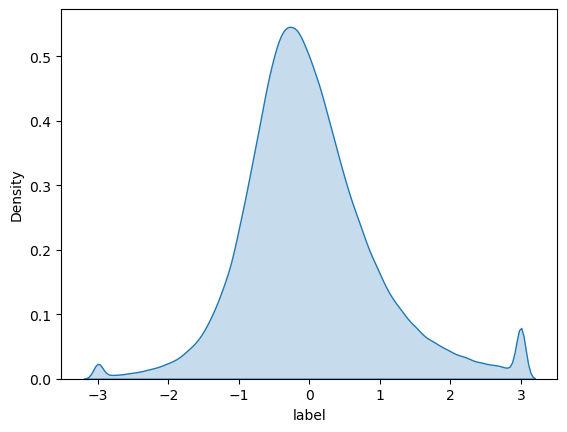

The distribution of y_valid:


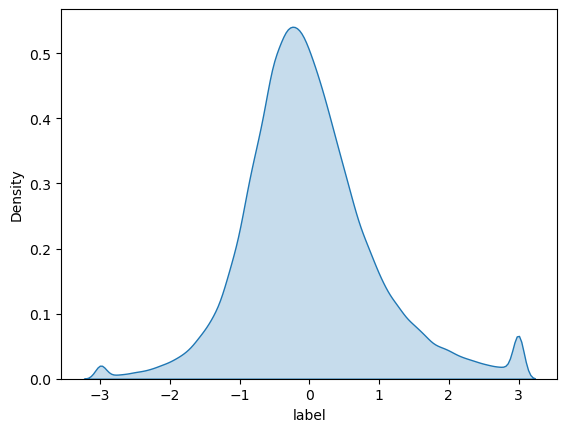

The distribution of y_test:


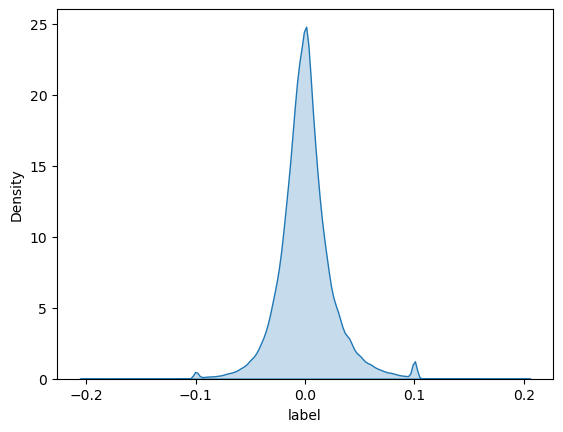

norm data done 

all works done 



In [5]:
split_params = {
    "test_start_date": "2019-01-01",
    "split_method": "group_split",
    "split_kwargs":{
        "train": 0.7,
        "valid": 0.3
    }
}

# 从训练集中按7：3的比例随机拆分出验证集, 并在截面上进行标准化
result = q.auto_process(X, "label", groupby="instrument", split_params=split_params, select=False, orth=False)

X_train, y_train, X_valid, y_valid = result["X_train"], result["y_train"], result["X_valid"], result["y_valid"]
X_test, y_test, ymean, ystd = result["X_test"], result["y_test"], result["ymean"], result["ystd"]

In [6]:
from scutquant import models

ensemble = models.Ensemble()
ensemble.fit(X_train, y_train, X_valid, y_valid)

pred = ensemble.predict(X_test)
pred = pd.DataFrame(pred, columns=["predict"], index=X_test.index)
pred["predict"] += ymean.groupby("datetime").shift(2).fillna(0.0002)
pred["predict"] *= ystd.groupby("datetime").shift(2).fillna(0.0189)

pred.describe()

Epoch 1/10
2361/2361 [==============================] - 57s 24ms/step - loss: 0.9397 - mae: 0.7232 - mape: 1522.4680 - val_loss: 0.9105 - val_mae: 0.7077 - val_mape: 3472.0144
Epoch 2/10
2361/2361 [==============================] - 57s 24ms/step - loss: 0.9016 - mae: 0.7091 - mape: 764.5644 - val_loss: 0.8999 - val_mae: 0.7091 - val_mape: 4273.3540
Epoch 3/10
2361/2361 [==============================] - 56s 24ms/step - loss: 0.8942 - mae: 0.7061 - mape: 585.0666 - val_loss: 0.8948 - val_mae: 0.7080 - val_mape: 3685.5549
Epoch 4/10
2361/2361 [==============================] - 54s 23ms/step - loss: 0.8875 - mae: 0.7032 - mape: 645.1785 - val_loss: 0.8911 - val_mae: 0.7029 - val_mape: 1751.6564
Epoch 5/10
2361/2361 [==============================] - 57s 24ms/step - loss: 0.8836 - mae: 0.7018 - mape: 776.1976 - val_loss: 0.8875 - val_mae: 0.7017 - val_mape: 1383.7391
Epoch 6/10
2361/2361 [==============================] - 55s 23ms/step - loss: 0.8801 - mae: 0.7001 - mape: 836.0698 - val_lo

,predict
count,281836.000000
mean,0.000108
std,0.001421
min,-0.009469
25%,-0.000804
50%,0.000072
75%,0.000989
max,0.008080


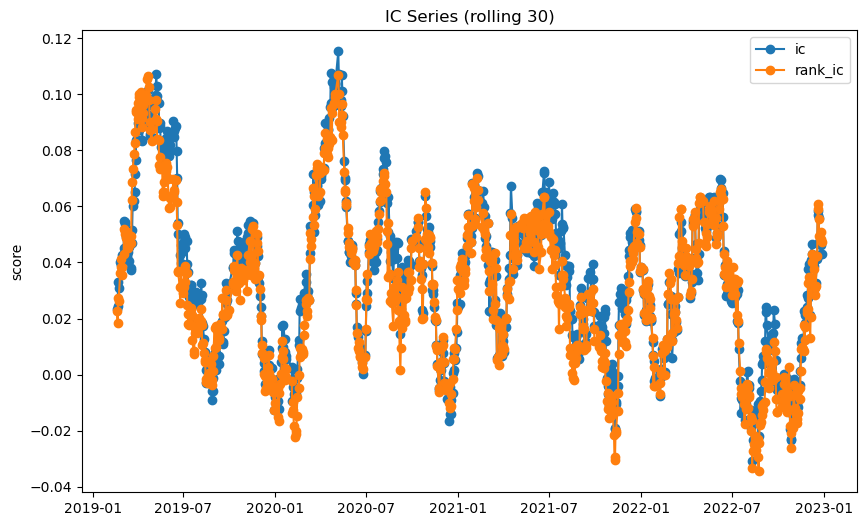

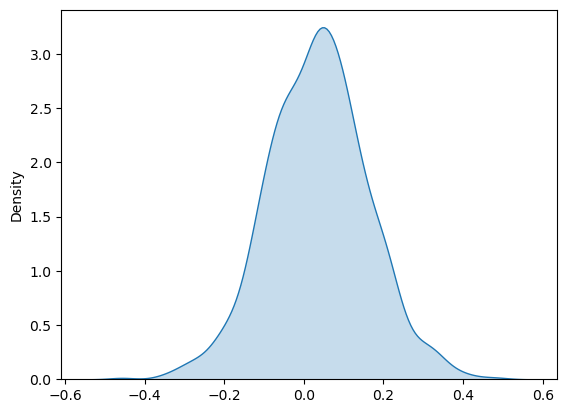

ic= 0.034297179349887554 icir= 0.2726220699300594 rank_ic= 0.030727279443763862 rank_icir= 0.239714580049818


0.03013550830499003

In [7]:
# 使用IC评判拟合优度
ic, icir, rank_ic, rank_icir = q.ic_ana(pred, y_test, groupby='datetime')
print('ic=', ic, 'icir=', icir, 'rank_ic=', rank_ic, 'rank_icir=', rank_icir)
# 使用pearson相关系数评判拟合优度
r = q.pearson_corr(pred.values, y_test)
r[0]

Accuracy of Prediction: 0.5283280380408129


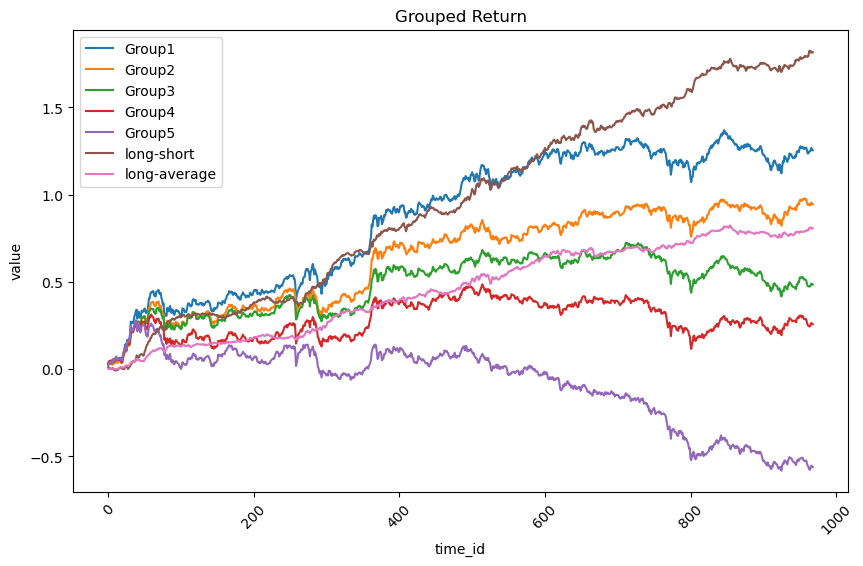

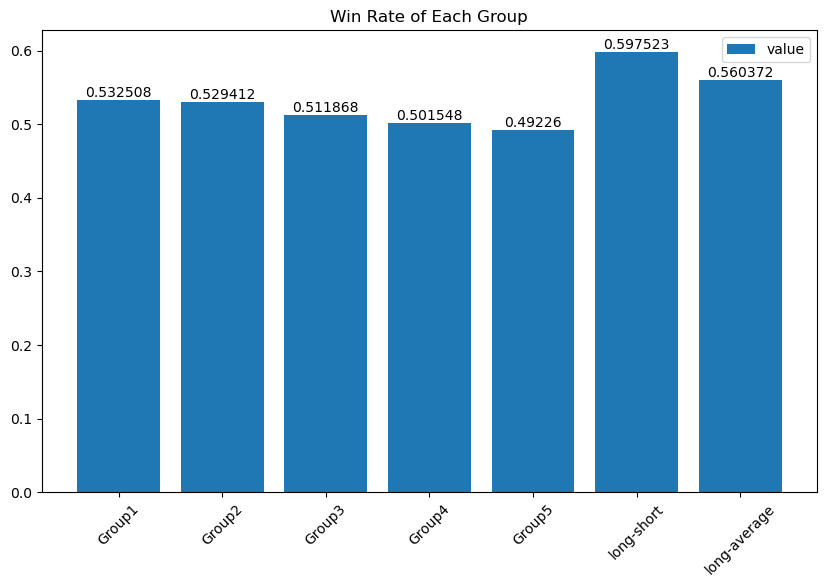

In [8]:
df_test = df[df.index.get_level_values(0) >= "2019-01-01"]
pred = executor.prepare(pred, df_test, price='mean_price', volume='vol', real_ret=y_test)
report.group_return_ana(pred, y_test)

In [9]:
backtest = {
    "generator": {
        "mode": "generate"
    },
    "strategy": {
        "class": "SigmaStrategy",  # 做多预测值前20%股票, 做空后20%的股票. 自动平仓
        "kwargs": {
            "sigma": 1, 
            "auto_offset": False,
            "offset_freq": 2, # 应为delta_t + 1, 例如目标值是close_-2 / close_-1 - 1, 则delta_t = 1
            "buy_only": False,  # =True时，只做多不做空(在A股做空有一定的难度)
            "short_volume": 500, # 融券做空的数量
            "risk_degree": 0.95,  # 将风险度控制在这个数，如果超过了就按比例减持股票直到风险度小于等于它为止
            "unit": None,  # 由于数据已经是以手为单位, 故无需二次处理
            "max_volume": 0.05  # 手数随可用资金而改变，最大不会超过股票当天成交量的1%(例如T+1时下单，下单手数不会超过T时成交量的1%)
        }
    },
    "account": None, # 使用默认账户, 即初始资金为1亿, 无底仓 (注意策略容量！)
    "trade_params": {
        "cost_buy": 0.0015,  # 佣金加上印花税
        "cost_sell": 0.0015,  
        "min_cost": 5,
    }
}
generator, strategy, account, trade_params = backtest["generator"], backtest["strategy"], backtest["account"], backtest["trade_params"]
exe = executor.Executor(generator, strategy, account, trade_params)
exe.execute(data=pred, verbose=0)  # verbose=1时，按时间输出买卖指令

Annualized Return: 0.09754348149951553
Annualized Volatility: 0.32933636899122676
Annualized Return(Benchmark): 0.09295809982780767
Annualized Volatility(Benchmark): 0.3587060456571527 

Cumulative Rate of Return: 0.43031335700089723
Cumulative Rate of Return(Benchmark): 0.4074717885488688
Cumulative Excess Rate of Return: 0.02284156845202845 

Max Drawdown: -0.3593468770373158
Max Drawdown(Benchmark): -0.46206107268917274
Max Drawdown(Excess Return): -0.23850697566985013 

Sharpe Ratio: 2.3550759350165076
Sortino Ratio: -0.22550808049189924
Information Ratio: -0.23953626556289986 

Beta: 0.8907759273668076
Alpha: 0.007374738080054066
Epsilon: 0.04068570616956787
Profitable Days(%): 0.18988648090815274


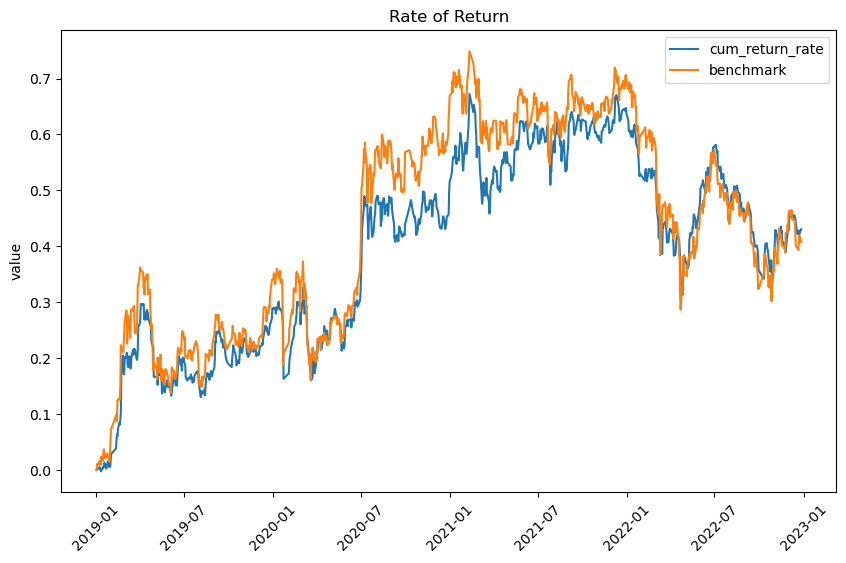

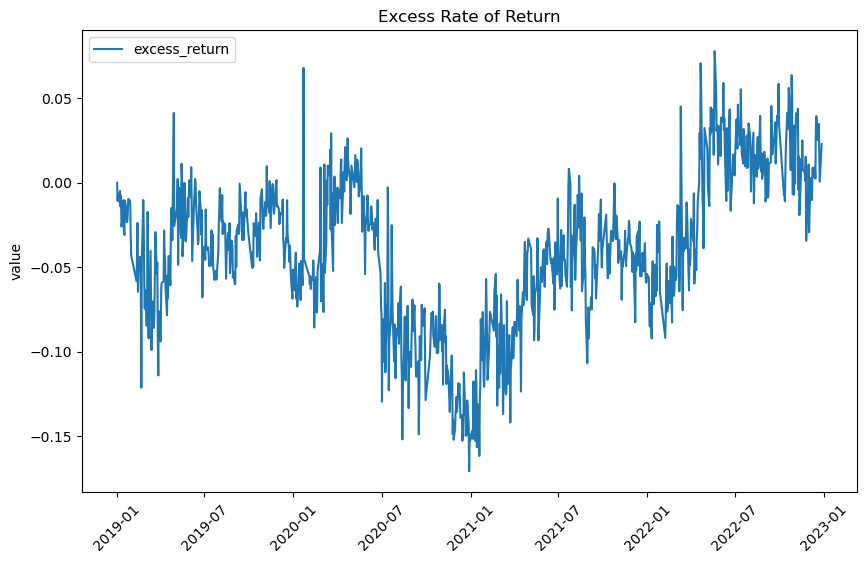

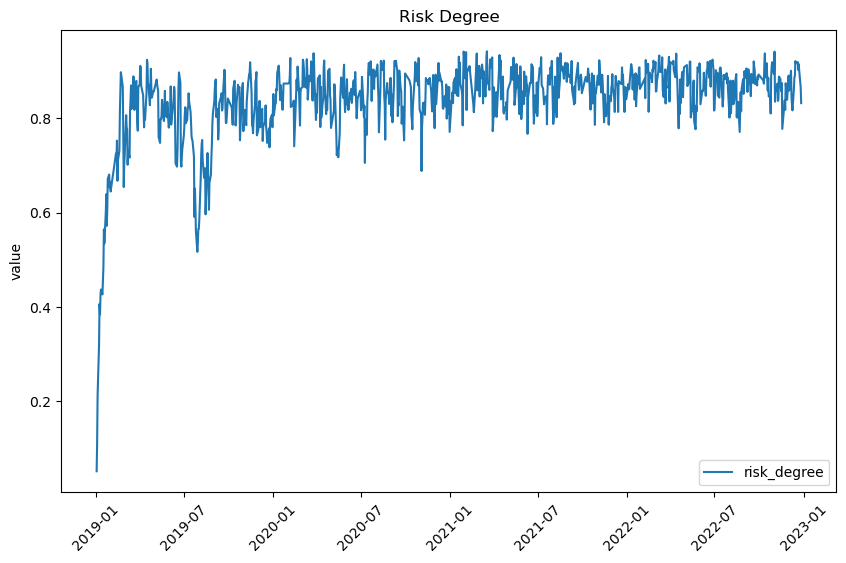

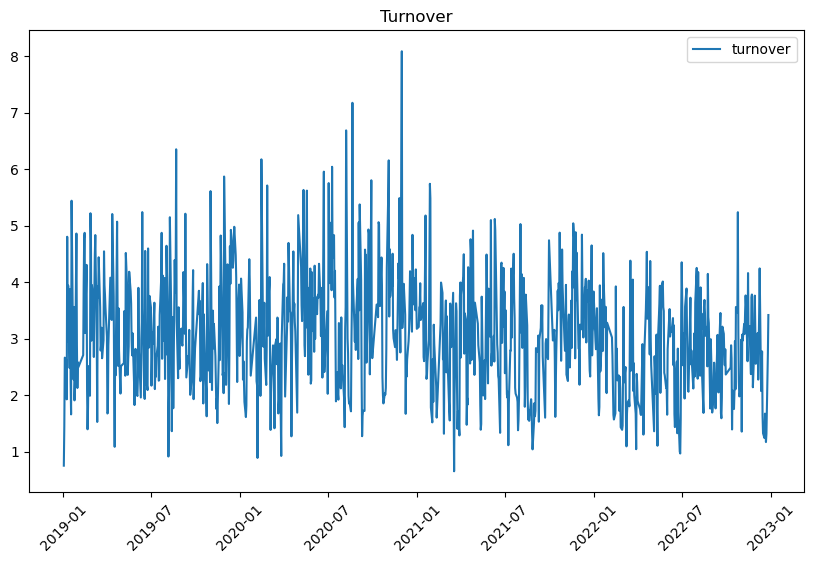

In [10]:
user_account, benchmark = exe.user_account, exe.benchmark
report.report_all(user_account, benchmark, freq=365, time=exe.time)  # 无风险收益率默认为年化3%，可以通过参数rf调节

In [11]:
# ensemble.save()